<a href="https://colab.research.google.com/github/dsaint31x/OpenCV_Python_Tutorial/blob/master/DIP/DIP_09_00_MorphologicalProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
url_b = 'https://t1.daumcdn.net/cfile/tistory/9983894C5B93B3AA04'
url = 'https://raw.githubusercontent.com/dltpdn/opencv-python_edu/master/img/moon_gray.jpg'

In [2]:
from urllib import request 

fstr = 'image/holes.jpg'
request.urlretrieve(url_b,fstr)
print('saved ok : holes.jpg')

fstr = "image/test.jpg" 
request.urlretrieve(url,fstr) 
print("저장되었습니다.")


saved ok : holes.jpg
저장되었습니다.


(900, 900)


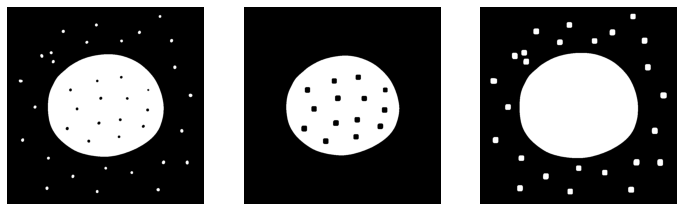

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('image/holes.jpg',cv2.IMREAD_GRAYSCALE)
_,img = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(img.shape)
k = cv2.getStructuringElement(cv2.MORPH_RECT, (13,13))
erosion = cv2.erode(img, k)
dilation = cv2.dilate(img, k)

plt.figure('src vs. erosion vs. dilation', figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(erosion,cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(dilation,cmap='gray')
plt.axis('off')

plt.show()

# Opening vs. Closing

## Opening

`Erosion -> Dilation`
* remove the noise of small size
* remove weak connections

## Closing

`Dilation -> Erosion`
* fill a small gap
* strengthen connections

## OpenCV Document
[OpenCV Document Link](https://docs.opencv.org/4.5.4/d4/d86/group__imgproc__filter.html#ga7be549266bad7b2e6a04db49827f9f32)


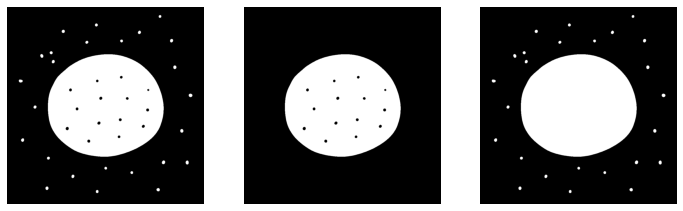

In [4]:
opening = cv2.morphologyEx(img,cv2.MORPH_OPEN,k)
closing = cv2.morphologyEx(img,cv2.MORPH_CLOSE,k)

plt.figure('ori vs. open vs. close', figsize=(12,6))
plt.subplot(1,3,1)
plt.axis('off')
plt.imshow(img,cmap='gray')

plt.subplot(1,3,2)
plt.axis('off')
plt.imshow(opening,cmap='gray')

plt.subplot(1,3,3)
plt.axis('off')
plt.imshow(closing, cmap='gray')

plt.show()

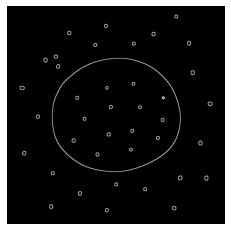

In [5]:
k_np = np.full(shape=(3,3),fill_value=255,dtype=np.uint8)
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,k_np)
plt.imshow(gradient, cmap='gray')
plt.axis('off')
plt.show()

# Tophat vs. Blackhat

## Tophat

`Original - Opening`
* strength region having higher intensity than neighbors

## Blackhat

`Original - Closing`
* strength region having lower intensity than neighbors


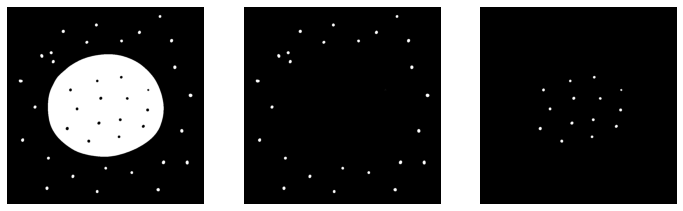

In [6]:
tophat = cv2.morphologyEx(img,cv2.MORPH_TOPHAT, k)
blackhat = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT, k)

plt.figure('src vs. tophat vs. blackhat',figsize=(12,4))
plt.subplot(1,3,1)
plt.axis('off')
plt.imshow(img,cmap='gray')
plt.subplot(1,3,2)
plt.axis('off')
plt.imshow(tophat,cmap='gray')
plt.subplot(1,3,3)
plt.axis('off')
plt.imshow(blackhat,cmap='gray')
plt.show()

In [7]:
import cv2
import numpy as np

img = cv2.imread('image/test.jpg',cv2.IMREAD_GRAYSCALE)
print(img.shape)
k = cv2.getStructuringElement(cv2.MORPH_RECT,(9,9))

tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, k)

blackhat= cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, k)

(424, 410)


In [8]:
k

array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

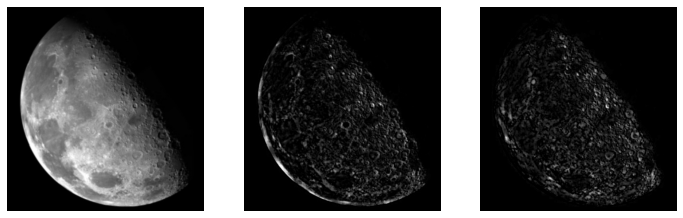

In [9]:
import matplotlib.pyplot as plt

plt.figure('src vs. tophat vs. blackhat',figsize=(12,4))
plt.subplot(1,3,1)
plt.axis('off')
plt.imshow(img, cmap='gray')

plt.subplot(1,3,2)
plt.axis('off')
plt.imshow(tophat,cmap='gray')

plt.subplot(1,3,3)
plt.axis('off')
plt.imshow(blackhat,cmap='gray')

plt.show()

(424, 410)
255 0
44 0
26 0


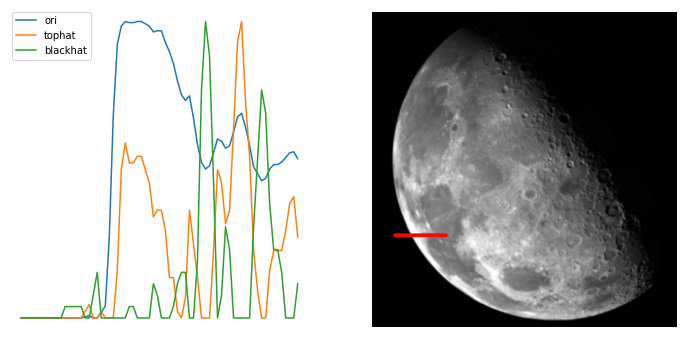

In [10]:
print(img.shape)

def m_n_norm(data) :
  min = np.min(data)
  max = np.max(data)
  print(max,min)
  ret = (data-min)/(max-min)
  return ret

plt.figure('tophat and blackhat',figsize=(12,6))

plt.subplot(1,2,1)
plt.axis('off')
plt.plot(m_n_norm(img[300,30:100]),label='ori')
plt.plot(m_n_norm(tophat[300,30:100]),label='tophat')
plt.plot(m_n_norm(blackhat[300,30:100]),label='blackhat')
plt.legend()

plt.subplot(1,2,2)
img_display = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
cv2.line(img_display, (30,300), (100,300), (255,0,0), 3)
plt.axis('off')
plt.imshow(img_display)

plt.show()

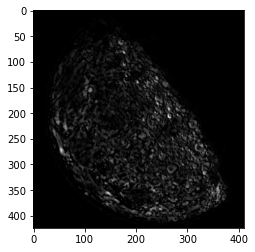

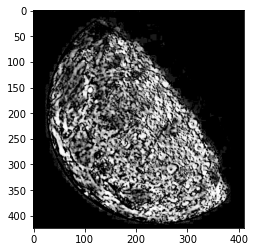

In [15]:
#tl = np.log(blackhat).astype(np.float)
tl = blackhat
tl = cv2.cvtColor(blackhat,cv2.COLOR_GRAY2BGR)
tl = cv2.cvtColor(tl,cv2.COLOR_BGR2HSV)
tl[:,:,2] = cv2.equalizeHist(tl[:,:,2])
tl = cv2.cvtColor(tl,cv2.COLOR_HSV2RGB)

plt.figure('ori')
plt.imshow(blackhat,cmap='gray')
plt.figure('he')
plt.imshow(tl)


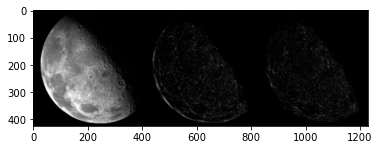

In [16]:
merged = np.hstack((img,tophat,blackhat))

import matplotlib.pyplot as plt
plt.imshow(merged,cmap='gray')